In [1]:
from xmitgcm import open_mdsdataset
import xgcm
import os
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import pandas as pd
import numpy as np
import xarray as xr
import math

In [2]:
#os.chdir('/home/jxchang/projects/def-jklymak/jxchang/HighRes1/results/TideU008N0LinH200ho140Ah0200Cdqdt003/python')
currentDirectory = os.getcwd()
data_dir = currentDirectory[:-7] + '/input/'
print(data_dir)

/scratch/jxchang/HighRes2/results/TideU008N0LinH200ho140Ah0200Cdqdt003/input/


In [3]:
ds1 = open_mdsdataset(data_dir, geometry='cartesian',endian='<',prefix=['statevars','energyvars'])
print(ds1.chunks)
ds1 = ds1.chunk(chunks={"XG":360,"XC":360})
print(ds1.chunks)

Frozen(SortedKeysDict({'YC': (120,), 'XC': (1488,), 'YG': (120,), 'XG': (1488,), 'Zp1': (41,), 'Z': (40,), 'time': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1), 'Zl': (40,)}))
Frozen(SortedKeysDict({'YC': (120,), 'XC': (360, 360, 360, 360, 48), 'YG': (120,), 'XG': (360, 360, 360, 360, 48), 'Zp1': (41,), 'Z': (40,), 'time': (1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [4]:
ds2 = open_mdsdataset(data_dir, geometry='cartesian', endian='<',prefix=['energymvars'])
ds2 = ds2.chunk(chunks={"XG":360,"XC":360})

grid = xgcm.Grid(ds1, periodic=False)
print(grid)

<xgcm.Grid>
Y Axis (not periodic, boundary=None):
  * center   YC --> left
  * left     YG --> center
X Axis (not periodic, boundary=None):
  * center   XC --> left
  * left     XG --> center
T Axis (not periodic, boundary=None):
  * center   time
Z Axis (not periodic, boundary=None):
  * center   Z --> left
  * left     Zl --> center
  * outer    Zp1 --> center
  * right    Zu --> center


In [5]:
xmin = 13000
xmax = 67000
ymin = 0
ymax = 3000
numcolt=21
numcolv=21

In [6]:
time1=ds1.coords['time'].values/np.timedelta64(1, 's')
time=ds2.coords['time'].values/np.timedelta64(1, 's')
xc=ds1.coords['XC']
xg=ds1.coords['XG']
yc=ds1.coords['YC']
yg=ds1.coords['YG']
z=ds1.coords['Z']
ix=[i for i, e in enumerate(xc) if (e > xmin) & (e < xmax)]
iy=[i for i, e in enumerate(yc) if (e > ymin) & (e < ymax)]
print(ix[0],ix[-1])
print(iy[0],iy[-1])

12 1023
0 119


In [7]:
viscAh=2.e-2
rhoNil=999.8
T=12.4*3600

In [8]:
ttlen=len(ds1.time)
print('the length of time:' + str(ttlen) )

the length of time:173


In [9]:
dt=time[1]-time[0]
print('dt:' +str(dt))

dt:1860.0


In [10]:
time_bin_labels = np.arange(12.4*60*60/2,time[-1]-20000,12.4*60*60)
print('time_bin_labels:' +str(time_bin_labels))

print(time[-1]/T)
nT=math.floor(time[-1]/T)

time_bin = pd.timedelta_range(0, periods=nT+1,freq='44660S')
print('time_bin:' + str(time_bin))
time_ns = pd.timedelta_range(0, periods=ttlen,freq='1860S')

time_bin_labels:[ 22320.  66960. 111600. 156240. 200880. 245520. 290160.]
7.166666666666667
time_bin:TimedeltaIndex(['0 days 00:00:00', '0 days 12:24:20', '1 days 00:48:40',
                '1 days 13:13:00', '2 days 01:37:20', '2 days 14:01:40',
                '3 days 02:26:00', '3 days 14:50:20'],
               dtype='timedelta64[ns]', freq='44660S')


In [11]:
# depth mean velocity
U0W=((ds1['UVEL']*ds1['drF']*ds1['hFacW']).sum('Z'))/(ds1.drF*ds1.hFacW*ds1.maskW).sum('Z')
V0S=((ds1['VVEL']*ds1['drF']*ds1['hFacS']).sum('Z'))/(ds1.drF*ds1.hFacS*ds1.maskS).sum('Z')
ds1['U0W']=xr.DataArray(U0W.data,coords=[time_ns,yc,xg],dims=['time','YC','XG'])
ds1['V0S']=xr.DataArray(V0S.data,coords=[time_ns,yg,xc],dims=['time','YG','XC'])
del U0W,V0S

In [12]:
# baroclinic velocity
ds1['maskL']=grid.interp(ds1.hFacC,'Z',to='left', boundary='extrapolate')  #mask for wvel
ds1['upW']=(ds1['UVEL']-ds1['U0W'])*ds1['maskW']
ds1['vpS']=(ds1['VVEL']-ds1['V0S'])*ds1['maskS']
wp=ds1['WVEL'].where(ds1['maskL'] !=0, np.nan)

In [13]:
# calculate horizontal dissipation
# setup other masks and hFac and dr
ds1['maskZ'] = grid.interp(ds1.hFacS, 'X', boundary='extrapolate') #for dvdx
ds1['hFacZ'] = grid.interp(ds1.hFacS, 'X', boundary='extrapolate') #for dvdx
ds1['hFacWL'] = grid.interp(ds1.hFacW, 'Z', to='left', boundary='extrapolate')  #for dwdx
print(ds1.hFacWL.dims)
ds1['hFacSL'] = grid.interp(ds1.hFacS, 'Z', to='left', boundary='extrapolate')  #for dwdy
print(ds1.hFacSL.dims)
ds1['drL']=grid.interp(ds1.drF, 'Z', to='left', boundary='extrapolate')

('Zl', 'YC', 'XG')
('Zl', 'YG', 'XC')


In [14]:
# 1 for dudx and dvdy, 2 for dvdx and dudy, 31 for dwdx, 32 for dwdy 
# separately calculate because grids are different
hDispbc1 = rhoNil*viscAh*(((grid.diff(ds1.upW* ds1.dyG , 'X', boundary='extrapolate')/ds1.rA)**2
                           +(grid.diff(ds1.vpS* ds1.dxG , 'Y', boundary='extrapolate')/ds1.rA)**2)*(ds1['drF']*ds1['hFacC'])).sum('Z')  #dudx & dvdy
hDispbc2 = rhoNil*viscAh*(((grid.diff(ds1.vpS* ds1.dyC , 'X', boundary='extrapolate')/ds1.rAz)**2
                           +(grid.diff(ds1.upW* ds1.dxC , 'Y', boundary='extrapolate')/ds1.rAz)**2)*(ds1['drF']*ds1['hFacZ'])).sum('Z') #dvdx & dudy
hDispbc31 = rhoNil*viscAh*(((grid.diff(wp ,'X',boundary='extrapolate')/ds1.dxC)**2)*(ds1['drL']*ds1['hFacWL'])).sum('Zl')  #dwdx
hDispbc32 = rhoNil*viscAh*(((grid.diff(wp ,'Y',boundary='extrapolate')/ds1.dyC)**2)*(ds1['drL']*ds1['hFacSL'])).sum('Zl')  #dwdy

In [15]:
# tidally averaged
ta_hDispbc1 = hDispbc1.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_hDispbc2 = hDispbc2.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_hDispbc31 = hDispbc31.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_hDispbc32 = hDispbc32.groupby_bins('time',time_bin,labels=time_bin_labels).mean()

In [16]:
# area integrated, all become only the function of time
hDsspbc1=(ta_hDispbc1*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
hDsspbc2=(ta_hDispbc2*ds2['rAz']).sel(XG=xg[(xg > xmin) & (xg < xmax)],YG=yg[(yg > ymin) & (yg < ymax)]).sum(['XG','YG'])/1e6
hDsspbc31=(ta_hDispbc31*ds2['rAw']).sel(XG=xg[(xg > xmin) & (xg < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XG','YC'])/1e6
hDsspbc32=(ta_hDispbc32*ds2['rAs']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YG=yg[(yg > ymin) & (yg < ymax)]).sum(['XC','YG'])/1e6

In [17]:
# which can be added together
hDsspbc=hDsspbc1+hDsspbc2+hDsspbc31+hDsspbc32
del hDsspbc1, hDsspbc2, hDsspbc31, hDsspbc32

In [18]:
# dEbtdt, the rate of baroctropic energy
dtEbt=np.gradient(ds1.SDIAG1.values*rhoNil,dt,axis=0)
print('dtEbc'+str(dtEbt.shape))
ddtEbt = xr.DataArray(dtEbt.data, coords=[ds1.time.values,yc,xc], dims=['time','YC', 'XC'])
ta_dtEbt = ddtEbt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
DtdEbt = (ta_dtEbt*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6

dtEbc(173, 120, 1488)


In [19]:
# dEbcdt, the rate of baroclinic energy
Ebc=rhoNil*ds1['SDIAG5']
dtEbc=np.gradient(Ebc,dt,axis=0)
print('dtEbc'+str(dtEbc.shape))
ddtEbc = xr.DataArray(dtEbc.data, coords=[ds1.time.values,yc,xc], dims=['time','YC', 'XC'])
ta_dtEbc = ddtEbc.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
DtdEbc= (ta_dtEbc*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
del Ebc, dtEbc

dtEbc(173, 120, 1488)


In [20]:
# hdFbt
Fxbt=ds2.SDIAG2+ds2.SDIAG4
Fybt=ds2.SDIAG3
Fxbt=xr.DataArray(rhoNil*Fxbt.values, coords=[ds2.time.values,yc,xg], dims=['time','YC','XG'])
Fybt=xr.DataArray(rhoNil*Fybt.values, coords=[ds2.time.values,yg,xc], dims=['time','YG','XC'])
ta_Fxbt=Fxbt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_Fybt=Fybt.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
hd_ta_Fbt=(grid.diff(ta_Fxbt*ds2['dyG'],'X',boundary='extrapolate')+grid.diff(ta_Fybt*ds2['dxG'],'Y',boundary='extrapolate'))/ds2['rA']
BTrad=(hd_ta_Fbt*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
BTfxdy=((ta_Fxbt*ds2['dyG']).isel(XG=ix[-1])-(ta_Fxbt*ds2['dyG']).isel(XG=ix[0])).sum('YC')/1e6

In [21]:
# hdFbc
uPbc=xr.DataArray(rhoNil*ds2['SDIAG6'].data, coords=[ds2.time.values,yc,xg], dims=['time','YC','XG'])
vPbc=xr.DataArray(rhoNil*ds2['SDIAG7'].data, coords=[ds2.time.values,yg,xc], dims=['time','YG','XC'])
uEbc=xr.DataArray(rhoNil*ds2['SDIAG8'].data, coords=[ds2.time.values,yc,xg], dims=['time','YC','XG'])
vEbc=xr.DataArray(rhoNil*ds2['SDIAG9'].data, coords=[ds2.time.values,yg,xc], dims=['time','YG','XC'])
#print(uPbc)
#print(uEbc)
Fxbc=uPbc+uEbc
Fybc=vPbc+vEbc
ta_Fxbc=Fxbc.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_Fybc=Fybc.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
#print(Fbc)
hd_ta_Fbc=(grid.diff(ta_Fxbc*ds2['dyG'],'X',boundary='extrapolate')+grid.diff(ta_Fybc*ds2['dxG'],'Y',boundary='extrapolate'))/ds2['rA']
BCrad=(hd_ta_Fbc*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
BCfxdy=((ta_Fxbc*ds2['dyG']).isel(XG=ix[-1])-(ta_Fxbc*ds2['dyG']).isel(XG=ix[0])).sum('YC')/1e6
del uPbc, vPbc, uEbc, vEbc, Fxbc, Fybc

In [22]:
# BC-BT conversion
Conv=xr.DataArray(rhoNil*ds2['SDIAG10'], coords=[ds2.time.values,yc,xc], dims=['time','YC','XC'])
#print('Conv'+str(Conv))
ta_Conv=Conv.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
#print('ta_Conv'+str(ta_Conv))
C=(ta_Conv*ds2['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6
print('C'+str(C))

C<xarray.DataArray (time_bins: 7)>
dask.array<truediv, shape=(7,), dtype=float64, chunksize=(7,), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05


In [23]:
# kl10 vertical dissipation
dz=200/40 #H/nz
Dsp=np.sum(rhoNil*ds1['KLeps']*dz,axis=1)
print(Dsp)
vDsp=xr.DataArray(Dsp.data, coords=[ds1.time.values,yc,xc], dims=['time','YC','XC'])
print('vDsp'+str(vDsp))
ta_dsp=vDsp.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
print('ta_dsp'+str(ta_dsp))
vD=((ta_dsp*ds1['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6)
print('vD'+str(vD))

<xarray.DataArray 'KLeps' (time: 173, YC: 120, XC: 1488)>
dask.array<sum-aggregate, shape=(173, 120, 1488), dtype=float64, chunksize=(1, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * XC       (XC) float64 612.4 1.821e+03 2.997e+03 ... 1.182e+05 1.194e+05
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
    rA       (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    Depth    (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    maskInC  (YC, XC) bool dask.array<chunksize=(120, 360), meta=np.ndarray>
    iter     (time) int64 dask.array<chunksize=(1,), meta=np.ndarray>
  * time     (time) timedelta64[ns] 00:00:00 00:31:00 ... 3 days 16:52:00
vDsp<xarray.DataArray 'sum-aggregate-7cd8da4bd76e48c73b79e700c0e88c21' (time: 173, YC: 120, XC: 1488)>
dask.array<sum-aggregate, shape=(173, 120, 1488), dtype=float64, chunksize=(1, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 0

In [24]:
# bottom drag
Cd=1e-3
UC=grid.interp(ds1.UVEL,'X', boundary='extrapolate') 
VC=grid.interp(ds1.VVEL,'Y', boundary='extrapolate') 
U0C=((UC*ds1['drF']*ds1['hFacC']).sum('Z'))/(ds1.drF*ds1.hFacC*ds1.maskC).sum('Z')
V0C=((VC*ds1['drF']*ds1['hFacC']).sum('Z'))/(ds1.drF*ds1.hFacC*ds1.maskC).sum('Z')
ds1['upC']=(UC-U0C)*ds1['maskC']
ds1['vpC']=(VC-V0C)*ds1['maskC']
wC = grid.interp(ds1.WVEL,'Z', boundary='extrapolate') 
print(wC)
absuH=(UC**2+VC**2)**0.5
D0=rhoNil*Cd*absuH*(UC*U0C+VC*V0C)
Dp=rhoNil*Cd*absuH*(UC*ds1.upC+VC*ds1.vpC+wC*wC)
print(Dp)

<xarray.DataArray 'mul-11c1d20a0957cfefe40d7b85140e43eb' (time: 173, Z: 40, YC: 120, XC: 1488)>
dask.array<mul, shape=(173, 40, 120, 1488), dtype=float64, chunksize=(1, 39, 120, 360), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:31:00 ... 3 days 16:52:00
  * Z        (Z) float64 -2.5 -7.5 -12.5 -17.5 ... -182.5 -187.5 -192.5 -197.5
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
  * XC       (XC) float64 612.4 1.821e+03 2.997e+03 ... 1.182e+05 1.194e+05
<xarray.DataArray (time: 173, Z: 40, YC: 120, XC: 1488)>
dask.array<mul, shape=(173, 40, 120, 1488), dtype=float64, chunksize=(1, 39, 119, 359), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) timedelta64[ns] 00:00:00 00:31:00 ... 3 days 16:52:00
  * Z        (Z) float64 -2.5 -7.5 -12.5 -17.5 ... -182.5 -187.5 -192.5 -197.5
  * YC       (YC) float64 12.5 37.5 62.5 87.5 ... 2.938e+03 2.962e+03 2.988e+03
  * XC       (XC) float64 612.4 1.821e+03 2.997e+03 .

In [25]:
ta_D0=D0.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
ta_Dp=Dp.groupby_bins('time',time_bin,labels=time_bin_labels).mean()
print('ta_D0'+str(ta_D0))
BD0=((ta_D0*ds1['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6)
BDp=((ta_Dp*ds1['rA']).sel(XC=xc[(xc > xmin) & (xc < xmax)],YC=yc[(yc > ymin) & (yc < ymax)]).sum(['XC','YC'])/1e6)
print('BD0'+str(BD0))
print('BDp'+str(BDp))

ta_D0<xarray.DataArray (time_bins: 7, Z: 40, YC: 120, XC: 1488)>
dask.array<stack, shape=(7, 40, 120, 1488), dtype=float64, chunksize=(1, 40, 119, 359), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05
  * Z          (Z) float64 -2.5 -7.5 -12.5 -17.5 ... -182.5 -187.5 -192.5 -197.5
  * YC         (YC) float64 12.5 37.5 62.5 ... 2.938e+03 2.962e+03 2.988e+03
  * XC         (XC) float64 612.4 1.821e+03 2.997e+03 ... 1.182e+05 1.194e+05
    rA         (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    Depth      (YC, XC) float64 dask.array<chunksize=(120, 360), meta=np.ndarray>
    maskInC    (YC, XC) bool dask.array<chunksize=(120, 360), meta=np.ndarray>
BD0<xarray.DataArray (time_bins: 7, Z: 40)>
dask.array<truediv, shape=(7, 40), dtype=float64, chunksize=(1, 40), chunktype=numpy.ndarray>
Coordinates:
  * time_bins  (time_bins) float64 2.232e+04 6.696e+04 ... 2.455e+05 2.902e+05
  * Z          (Z) fl

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


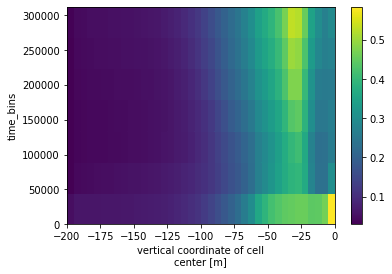

In [26]:
BD0.plot()

In [27]:
del dtEbt, ddtEbt, Fxbt, Fybt, Conv, VC, V0C, UC, U0C, D0, Dp

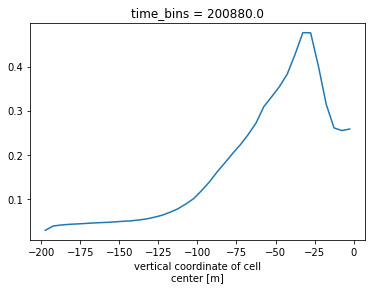

In [28]:
BD0.isel(time_bins=4).plot()

In [29]:
print(BD0.isel(Z=39).values)

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[0.05010285 0.03110881 0.0313474  0.02946346 0.02978685 0.03094452
 0.03232251]


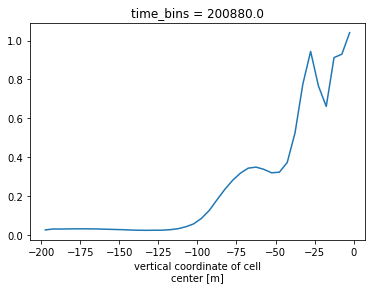

In [30]:
BDp.isel(time_bins=4).plot()

In [31]:
print(BDp.isel(Z=39).values)

/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/home/jxchang/jupyter_py3.7/lib/python3.7/site-packages/dask/array/numpy_compat.py:39: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


[0.01641372 0.02549331 0.02776692 0.0279944  0.02728024 0.02760537
 0.0286398 ]


In [ ]:
df = pd.DataFrame({"dEbt/dt": DtdEbt.values,"dEbc/dt": DtdEbc.values,"divFbc1": BCrad.values,"divFbc2": BCfxdy.values,"divFbt1": BTrad.values,"divFbt2": BTfxdy.values,"BC-BT Conv": C.values,"vDissp": vD.values,"hDissp": hDsspbc.values,'BD0':BD0.isel(Z=39).values,'BDp':BDp.isel(Z=39).values})
df.to_csv("TidallyAveragedEnergyBudget.csv")

In [ ]:
read_df = pd.read_csv("TidallyAveragedEnergyBudget.csv")

In [ ]:
print(read_df)

In [ ]:
import matplotlib.transforms as mtransforms

In [ ]:
f, ax =plt.subplots(figsize=(15,6))
trans_offset = mtransforms.offset_copy(ax.transData, fig=f,
                                       x=0.12, y=0.01, units='inches')

ax.set_ylim(-0.2,10)
ax.set_xlim(0,300000)

ax.set_ylabel("Energy Budget [MW]")
ax.set_xlabel("time [s]")

p1, = ax.plot(time_bin_labels,read_df["dEbc/dt"],'o-',label="dE/dt")
ax.text(time_bin_labels[6],read_df["dEbc/dt"][6], '%0.2f' % (read_df["dEbc/dt"][6]), transform=trans_offset)
ax.plot(time_bin_labels,read_df.divFbc2,'o-',label=r"$\nabla F_{bc}$")
ax.text(time_bin_labels[6],read_df["divFbc2"][6], '%0.2f' % (read_df["divFbc2"][6]), transform=trans_offset)
ax.plot(time_bin_labels,read_df['BC-BT Conv'],'o-',label="BT-BC Conversion")
ax.text(time_bin_labels[6],read_df["BC-BT Conv"][6], '%0.2f' % (read_df["BC-BT Conv"][6]), transform=trans_offset)
DL, = ax.plot(time_bin_labels,read_df.vDissp,'o-',label=r"Dissipation=$\int \rho \varepsilon dV$")
ax.text(time_bin_labels[6],read_df["vDissp"][6], '%0.2f' % (read_df["vDissp"][6]), transform=trans_offset)
ax.plot(time1,np.zeros(ttlen),'k--')
ax.plot(time_bin_labels,read_df.hDissp,'o-',label="horizontal bc Dssp")
ax.text(time_bin_labels[6],read_df["hDissp"][6], '%0.2f' % (read_df["hDissp"][6]), transform=trans_offset)
ax.plot(time_bin_labels,read_df.BDp,'o-',label="bottom drag")
ax.text(time_bin_labels[6],read_df["BDp"][6], '%0.2f' % (read_df["BDp"][6]), transform=trans_offset)

ax.plot(time_bin_labels,read_df.hDissp+read_df.vDissp+read_df.divFbc2,'o-',label="tot sum of", color='gray')
ax.text(time_bin_labels[6],(read_df.hDissp+read_df.vDissp+read_df.divFbc2)[6], '%0.2f' % ((read_df.hDissp+read_df.vDissp+read_df.divFbc2)[6]), transform=trans_offset)



plt.legend()
plt.savefig('./figs/BCEnergyBudget_x27_t_tidal_p.png')
plt.show()